# Forecasting by LSTM

In [183]:
import numpy as np
import pandas as pd

# Load the necessary datasets
cal_data = pd.read_csv('calendar.csv')
salestv_data = pd.read_csv('sales_train_evaluation.csv')  # Change here to use the evaluation data
ss_data = pd.read_csv('sample_submission.csv')

In [187]:
salestv_data

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [189]:
cal_data 

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [193]:
ss_data

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
salestv_data.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,...,1.445490,1.781174,1.965267,1.389374,1.271794,1.216661,1.212299,1.395605,1.689669,1.782158
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,...,3.656824,4.426550,4.706284,3.313292,3.126178,3.000348,2.955910,3.514318,4.089208,4.284356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.000000,316.000000,370.000000,385.000000,353.000000,...,143.000000,156.000000,187.000000,98.000000,90.000000,77.000000,84.000000,110.000000,156.000000,117.000000


In [201]:
salestv_data.isnull().sum() 

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1937      0
d_1938      0
d_1939      0
d_1940      0
d_1941      0
Length: 1947, dtype: int64

In [203]:
salestv_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [205]:
# Reduce memory usage by downcasting data types
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == 'float64']
    int_cols = [c for c in df if df[c].dtype in ['int32', 'int64']]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

salestv_data_downcast = downcast_dtypes(salestv_data)
print(salestv_data_downcast.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int16(1941), object(6)
memory usage: 114.3+ MB
None


In [207]:
# Transpose the data to make the dates as rows and products as columns
salestv_data_downcast = salestv_data_downcast.T

# Remove the first 6 rows (product identifiers) and only keep sales data
startDay = 0  # Modify if needed to skip the starting days
salestv_data_downcast = salestv_data_downcast[6 + startDay:]

# Verify the format
salestv_data_downcast


,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
d_5,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,0,0,0,1,0,0,1,5,0,1,...,3,6,3,0,0,1,0,1,0,0
d_1938,3,0,2,3,0,0,0,4,0,1,...,1,4,3,1,2,0,1,0,1,2
d_1939,3,0,3,0,2,5,1,1,0,0,...,3,4,3,1,1,0,0,1,1,2
d_1940,0,0,0,2,1,2,1,40,1,0,...,0,1,0,0,3,1,1,0,1,5


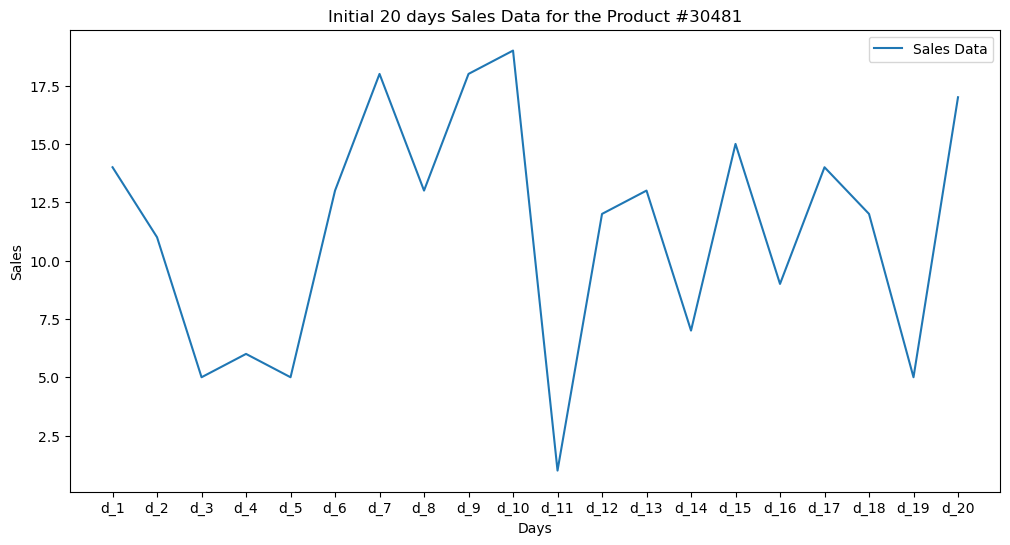

In [225]:
import matplotlib.pyplot as plt

# Plot the first few days (20 days) of sales data for the product #30481
plt.figure(figsize=(12, 6))
plt.plot(salestv_data_downcast.iloc[:20, 30481], label='Sales Data')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Initial 20 days Sales Data for the Product #30481')
plt.legend()
plt.show()

In [227]:
# Create a dataframe to mark days before events in the calendar data
daysBeforeEvent = pd.DataFrame(np.zeros((1969, 1)))
daysBeforeEvent

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1964,0.0
1965,0.0
1966,0.0
1967,0.0


In [231]:
# Mark "1" for days before an event
for x, y in cal_data.iterrows():
    if x != 0 and pd.notnull(cal_data['event_name_1'][x]):
        daysBeforeEvent.iloc[x - 1, 0] = 1
daysBeforeEvent

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1964,0.0
1965,0.0
1966,0.0
1967,1.0


In [233]:
# Ensure the train dataset is sliced correctly to match salestv_data_downcast shape
daysBeforeEventTrain = daysBeforeEvent[startDay:1913]
daysBeforeEventTrain

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1908,0.0
1909,0.0
1910,0.0
1911,0.0


In [235]:
# Assign column names
daysBeforeEventTrain.columns = ['oneDayBeforeEvent']
daysBeforeEventTrain

,oneDayBeforeEvent
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1908,0.0
1909,0.0
1910,0.0
1911,0.0


In [237]:
# Ensure that the indices match between sales data and event data
daysBeforeEventTrain.index = salestv_data_downcast.index[:1913]
daysBeforeEventTrain

,oneDayBeforeEvent
d_1,0.0
d_2,0.0
d_3,0.0
d_4,0.0
d_5,0.0
...,...
d_1909,0.0
d_1910,0.0
d_1911,0.0
d_1912,0.0


In [239]:
# Add the event feature to the sales data
final_data = pd.concat([salestv_data_downcast.iloc[:1913], daysBeforeEventTrain], axis=1)
final_data

,0,1,2,3,4,5,6,7,8,9,...,30481,30482,30483,30484,30485,30486,30487,30488,30489,oneDayBeforeEvent
d_1,0,0,0,0,0,0,0,12,2,0,...,14,1,0,4,0,0,0,0,0,0.0
d_2,0,0,0,0,0,0,0,15,0,0,...,11,1,0,4,0,0,6,0,0,0.0
d_3,0,0,0,0,0,0,0,0,7,1,...,5,1,0,2,2,0,0,0,0,0.0
d_4,0,0,0,0,0,0,0,0,3,0,...,6,1,0,5,2,0,2,0,0,0.0
d_5,0,0,0,0,0,0,0,0,0,0,...,5,1,0,2,0,0,2,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1909,1,1,1,0,1,0,1,4,0,0,...,1,1,0,0,0,0,1,1,0,0.0
d_1910,3,0,0,1,2,0,0,6,0,0,...,3,3,0,2,1,0,0,0,0,0.0
d_1911,0,0,1,3,2,2,0,3,0,2,...,1,6,0,3,0,0,0,3,0,0.0
d_1912,1,0,1,7,2,0,1,2,0,0,...,0,0,4,2,0,1,1,1,0,0.0


In [241]:
# Ensure all column names are strings
final_data.columns = final_data.columns.astype(str)
final_data

,0,1,2,3,4,5,6,7,8,9,...,30481,30482,30483,30484,30485,30486,30487,30488,30489,oneDayBeforeEvent
d_1,0,0,0,0,0,0,0,12,2,0,...,14,1,0,4,0,0,0,0,0,0.0
d_2,0,0,0,0,0,0,0,15,0,0,...,11,1,0,4,0,0,6,0,0,0.0
d_3,0,0,0,0,0,0,0,0,7,1,...,5,1,0,2,2,0,0,0,0,0.0
d_4,0,0,0,0,0,0,0,0,3,0,...,6,1,0,5,2,0,2,0,0,0.0
d_5,0,0,0,0,0,0,0,0,0,0,...,5,1,0,2,0,0,2,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1909,1,1,1,0,1,0,1,4,0,0,...,1,1,0,0,0,0,1,1,0,0.0
d_1910,3,0,0,1,2,0,0,6,0,0,...,3,3,0,2,1,0,0,0,0,0.0
d_1911,0,0,1,3,2,2,0,3,0,2,...,1,6,0,3,0,0,0,3,0,0.0
d_1912,1,0,1,7,2,0,1,2,0,0,...,0,0,4,2,0,1,1,1,0,0.0


In [243]:
# Output the final dataframe
final_data

,0,1,2,3,4,5,6,7,8,9,...,30481,30482,30483,30484,30485,30486,30487,30488,30489,oneDayBeforeEvent
d_1,0,0,0,0,0,0,0,12,2,0,...,14,1,0,4,0,0,0,0,0,0.0
d_2,0,0,0,0,0,0,0,15,0,0,...,11,1,0,4,0,0,6,0,0,0.0
d_3,0,0,0,0,0,0,0,0,7,1,...,5,1,0,2,2,0,0,0,0,0.0
d_4,0,0,0,0,0,0,0,0,3,0,...,6,1,0,5,2,0,2,0,0,0.0
d_5,0,0,0,0,0,0,0,0,0,0,...,5,1,0,2,0,0,2,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1909,1,1,1,0,1,0,1,4,0,0,...,1,1,0,0,0,0,1,1,0,0.0
d_1910,3,0,0,1,2,0,0,6,0,0,...,3,3,0,2,1,0,0,0,0,0.0
d_1911,0,0,1,3,2,2,0,3,0,2,...,1,6,0,3,0,0,0,3,0,0.0
d_1912,1,0,1,7,2,0,1,2,0,0,...,0,0,4,2,0,1,1,1,0,0.0


In [245]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
final_data_scaled = sc.fit_transform(final_data)
final_data_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.16666667, ..., 0.25      , 0.        ,
        0.        ],
       [0.2       , 0.        , 0.16666667, ..., 0.08333333, 0.        ,
        0.        ],
       [0.2       , 0.        , 0.16666667, ..., 0.25      , 0.        ,
        0.        ]])

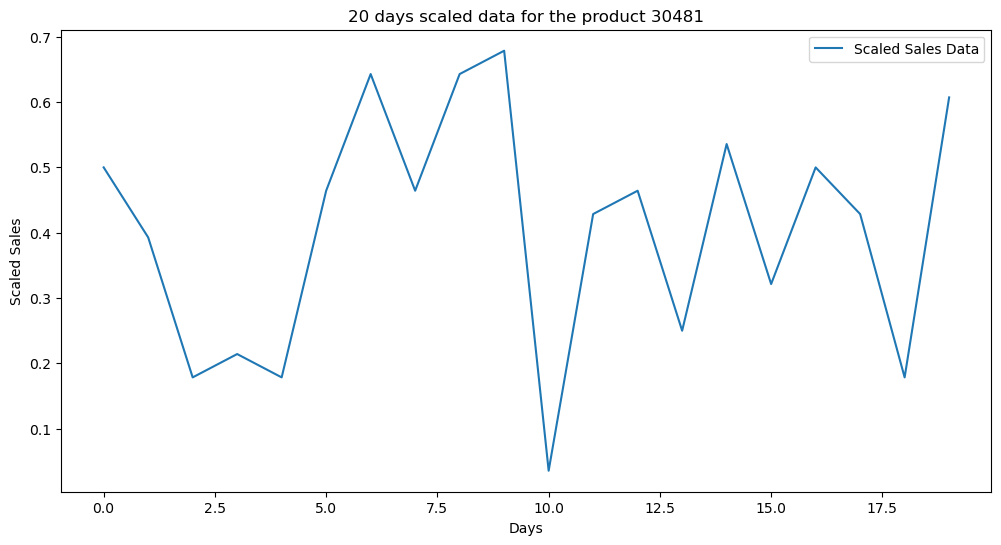

In [263]:
# Plot 20 days scaled data for the product 30481
plt.figure(figsize=(12, 6))
plt.plot(final_data_scaled[0:20, 30481], label='Scaled Sales Data')
plt.xlabel('Days')
plt.ylabel('Scaled Sales')
plt.title('20 days scaled data for the product 30481')
plt.legend()
plt.show()

In [266]:
# Define the number of timesteps (sequence length) for LSTM
timesteps = 14

# Initialize training sets
X_train = []
y_train = []

for i in range(timesteps, 1913 - startDay):
    X_train.append(final_data_scaled[i - timesteps:i])  # Last 14 days
    y_train.append(final_data_scaled[i][0:30490])  # Predict sales for the next day (excluding the event column)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Check the shapes
print(X_train.shape)
print(y_train.shape)

(1899, 14, 30491)
(1899, 30490)


In [268]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Initialize the LSTM model
regressor = Sequential()

# Add first LSTM layer with dropout
regressor.add(LSTM(units=300, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

# Add second LSTM layer with dropout
regressor.add(LSTM(units=200, return_sequences=True))
regressor.add(Dropout(0.2))

# Add third LSTM layer with dropout
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))

# Add output layer (one for each product)
regressor.add(Dense(units=30490))

# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
epoch_no = 32
batch_size_RNN = 44
regressor.fit(X_train, y_train, epochs=epoch_no, batch_size=batch_size_RNN)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 34s 705ms/step - loss: 0.0179
Epoch 2/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 32s 714ms/step - loss: 0.0142
Epoch 3/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 31s 703ms/step - loss: 0.0135
Epoch 4/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 744ms/step - loss: 0.0133
Epoch 5/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 34s 766ms/step - loss: 0.0129
Epoch 6/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 32s 720ms/step - loss: 0.0127
Epoch 7/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 32s 728ms/step - loss: 0.0125
Epoch 8/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 34s 742ms/step - loss: 0.0124
Epoch 9/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 745ms/step - loss: 0.0122
Epoch 10/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 34s 745ms/step - loss: 0.0121
Epoch 11/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 753ms/step - loss: 0.0120
Epoch 12/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 34s 761ms/step - loss: 0.0120
Epoch 13/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 744ms/step - loss: 0.0119
Epoch 14/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 1917s 45s/step - loss: 0.0119
Epoch 15/32
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 

In [269]:
# Prepare the test data (last 14 days before d_1914)
inputs = final_data_scaled[-timesteps:]

# Transform the inputs
X_test = [inputs[0:timesteps]]
X_test = np.array(X_test)

# Make predictions for the next 28 days (d_1914 to d_1941)
predictions = []
for j in range(timesteps, timesteps + 28):
    predicted_sales = regressor.predict(X_test[0, j - timesteps:j].reshape(1, timesteps, 30491))
    testInput = np.column_stack((predicted_sales, daysBeforeEventTest.iloc[j - timesteps, 0]))  # Append event feature
    X_test = np.append(X_test, testInput).reshape(1, j + 1, 30491)
    predicted_sales = sc.inverse_transform(testInput)[:, 0:30490]
    predicted_sales = np.round(predicted_sales).clip(min=0)
    predictions.append(predicted_sales)

# Convert predictions to the correct format for submission
predictions = np.array(predictions).reshape(28, 30490)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━

(28, 30490)


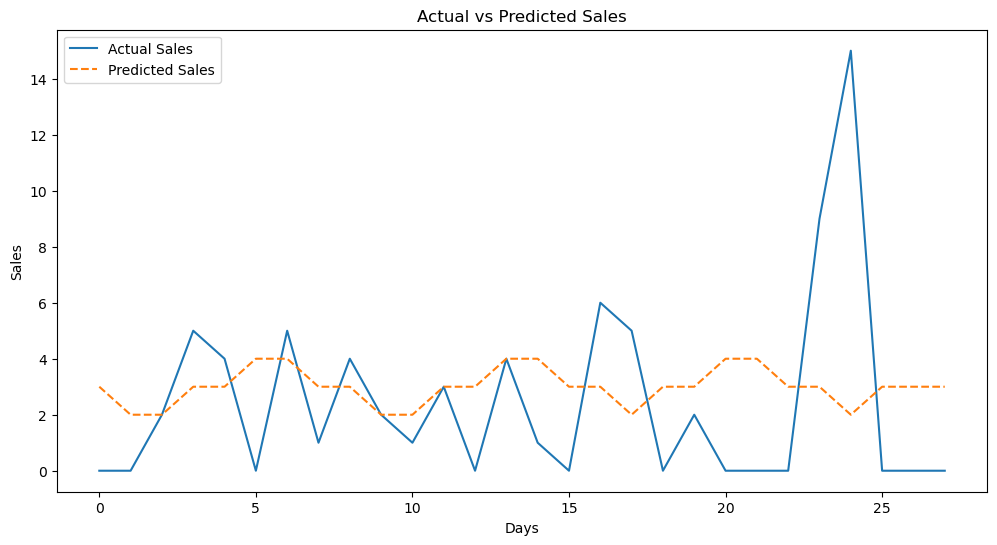

In [288]:
# Load the actual sales for d_1914 to d_1941
actual_sales = salestv_data.iloc[:, 1914:1942].T.values
print(actual_sales.shape)


# Plot predictions vs actual sales for a sample product 14
plt.figure(figsize=(12, 6))
plt.plot(actual_sales[:, 14], label='Actual Sales')
plt.plot(predictions[:, 14], label='Predicted Sales', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()


In [271]:

# Calculate RMSE for evaluation
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(actual_sales, predictions))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 2.247819592493011


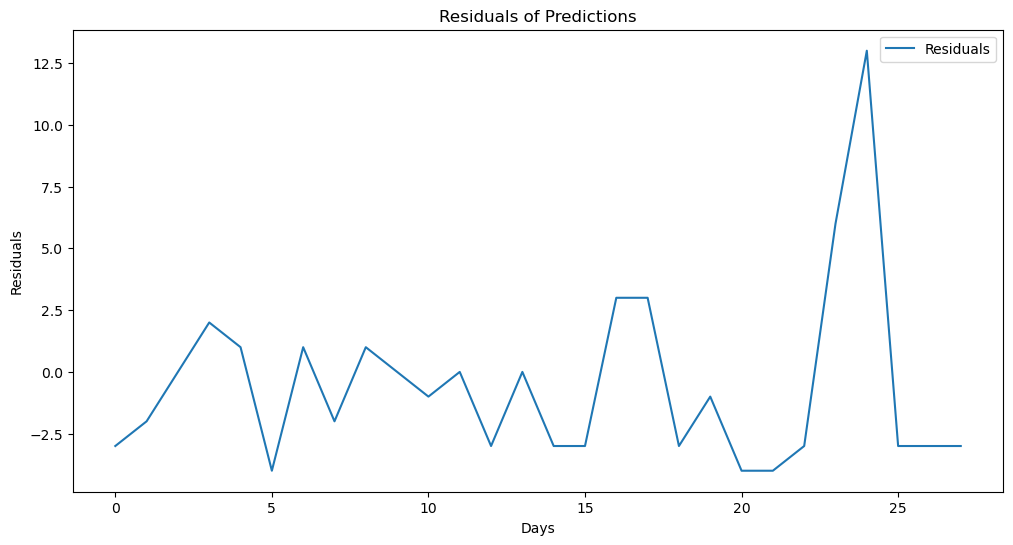

In [290]:
# Calculate and plot residuals
residuals = actual_sales - predictions
plt.figure(figsize=(12, 6))
plt.plot(residuals[:, 14], label='Residuals')
plt.xlabel('Days')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.legend()
plt.show()


In [292]:
# Prepare the submission format
submission = pd.DataFrame(data=np.array(predictions).reshape(28, 30490))
submission = submission.T
submission = pd.concat((submission, submission), ignore_index=True)

# Add ID column and format the submission
idColumn = ss_data[['id']]
submission[['id']] = idColumn
cols = list(submission.columns)
cols = cols[-1:] + cols[:-1]
submission = submission[cols]

# Rename columns to match submission format
submission.columns = ['id'] + [f'F{i}' for i in range(1, 29)]

# Save the submission file
submission.to_csv('submission.csv', index=False)